<a href="https://colab.research.google.com/github/A-ArunPrakash/AIML_AP/blob/main/2313021_Assignment2_LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [39]:
df= pd.read_csv('Life Expectancy Data.csv')

In [40]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [41]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [42]:
# Counting the number of null values in each rows
df.isna().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [43]:
df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [44]:
# Discriptive statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [46]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [47]:
print("Row & Column")
df.shape

Row & Column


(2938, 22)

In [48]:
df.duplicated().sum()

0

In [49]:
# Counting the number of unquie value
df.nunique()

,0
Country,193
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
infant deaths,209
Alcohol,1076
percentage expenditure,2328
Hepatitis B,87
Measles,958


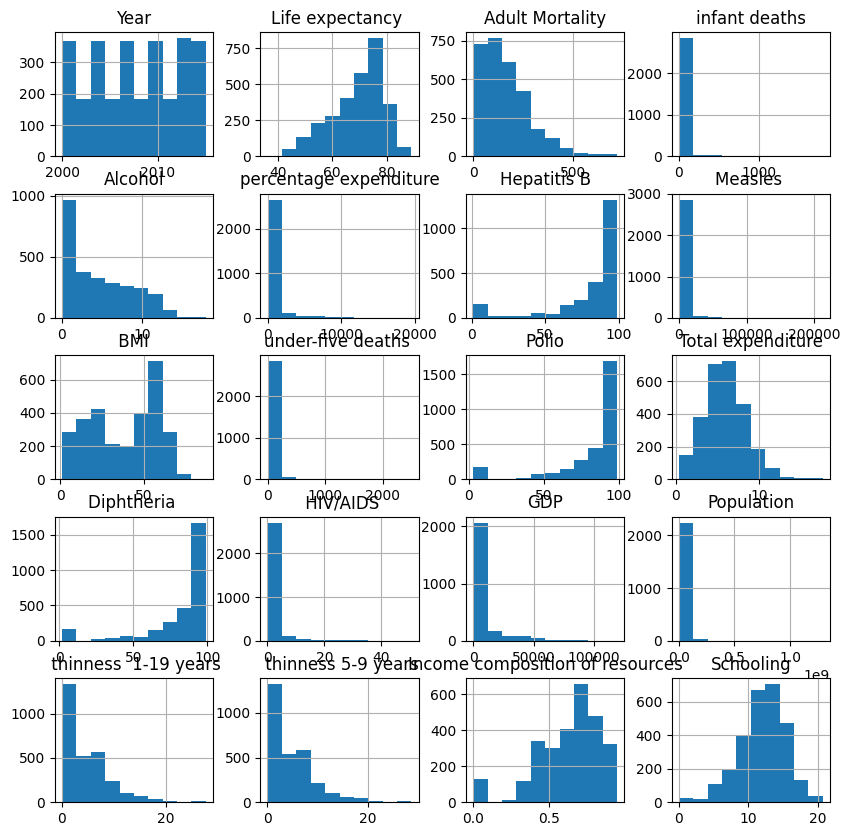

In [50]:
df.hist(figsize=(10,10))
plt.show()

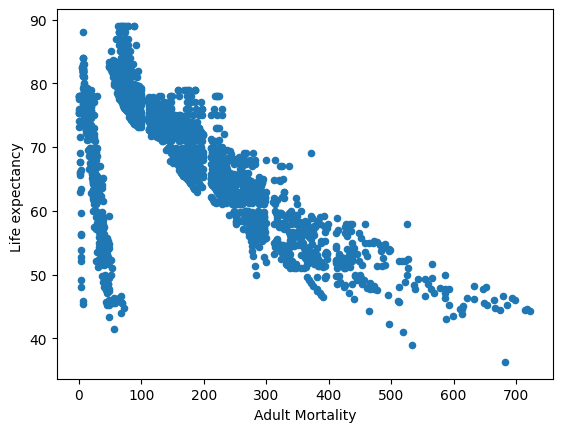

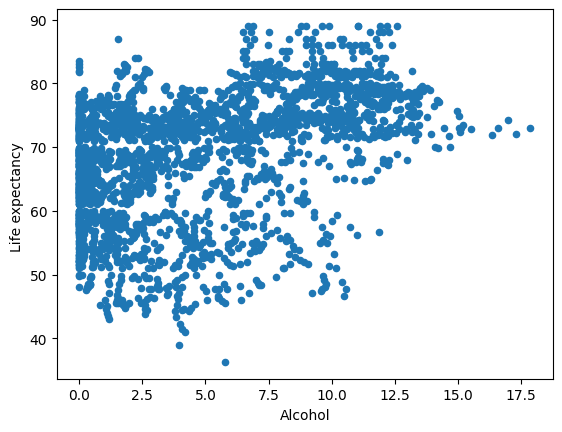

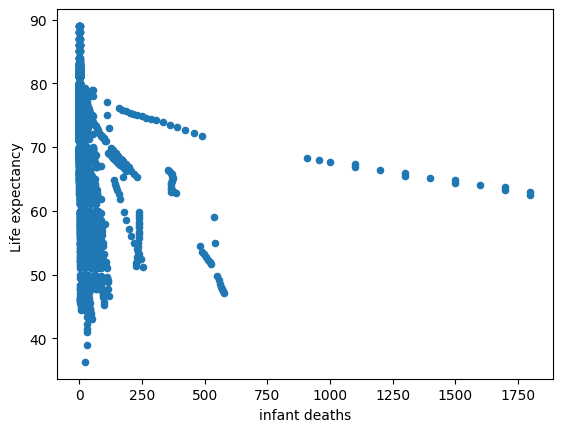

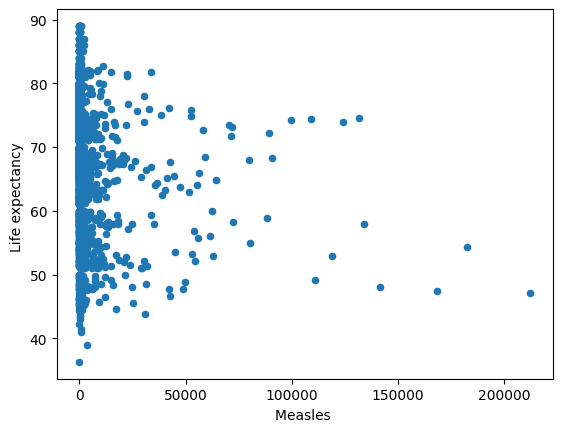

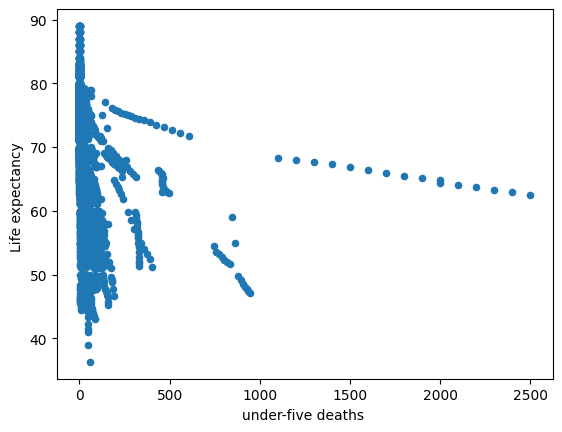

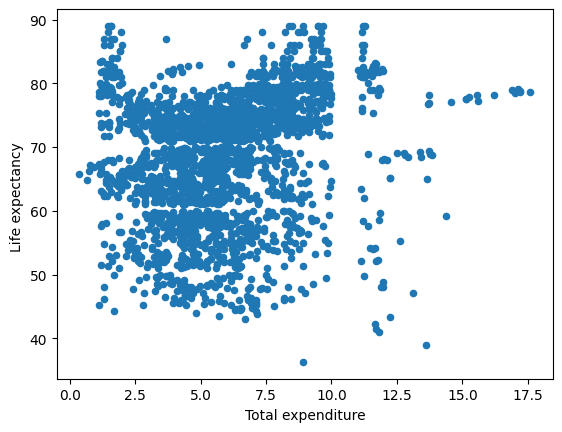

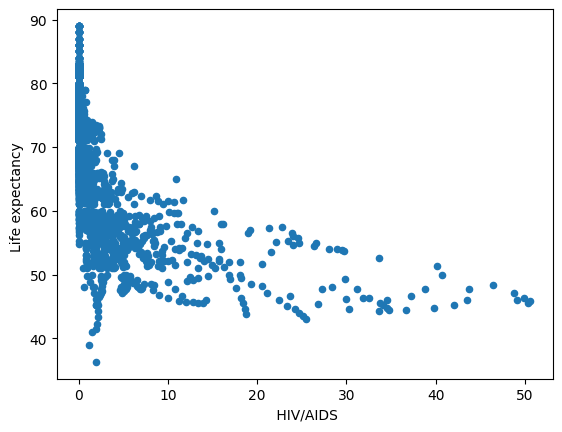

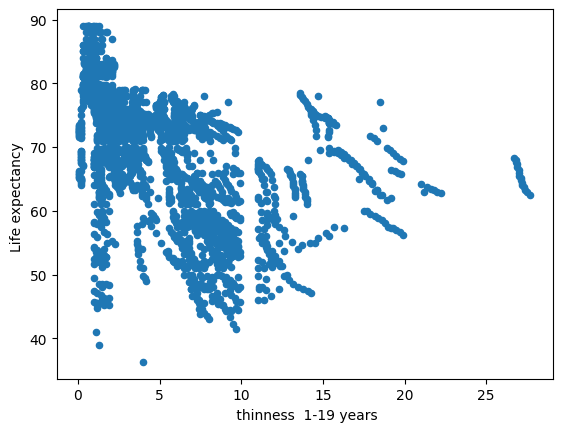

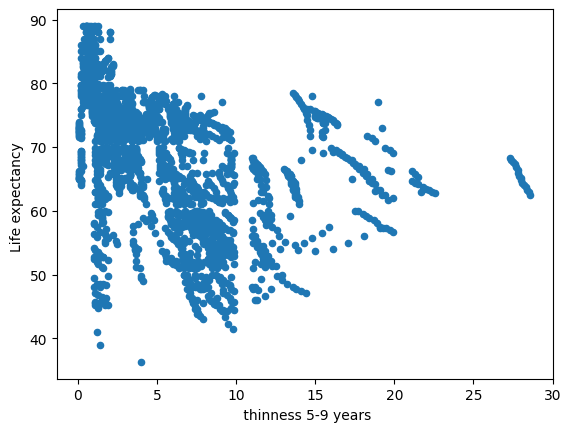

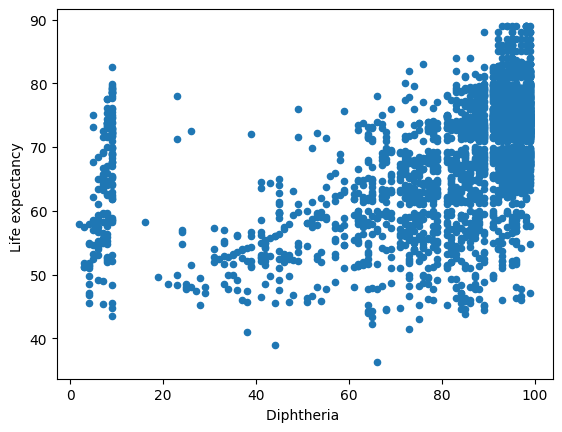

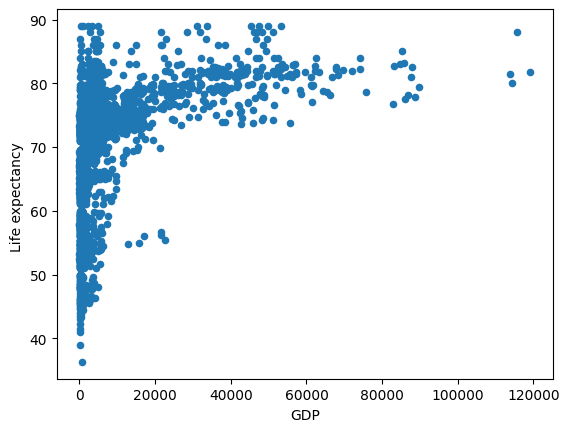

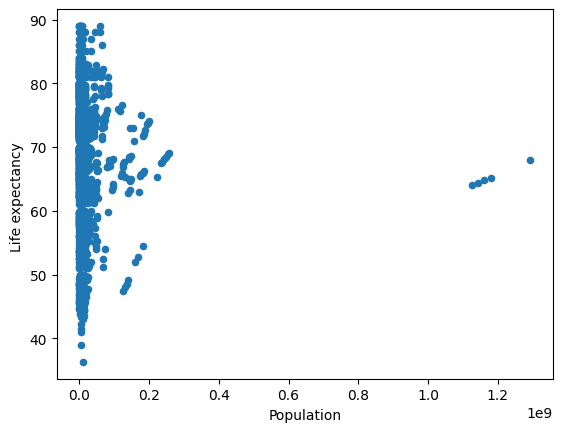

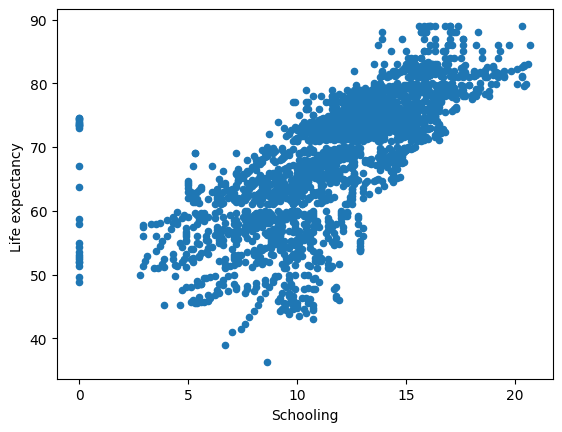

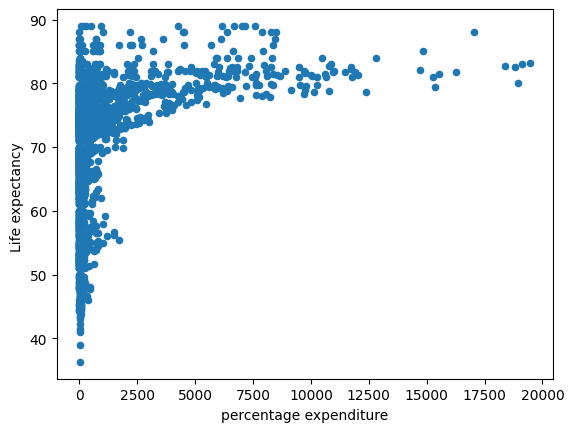

In [51]:
df.plot(kind="scatter", x="Adult Mortality", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x="Alcohol", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x="infant deaths", y="Life expectancy ")
plt.show

df.plot(kind="scatter", x="Measles ", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x="under-five deaths ", y= "Life expectancy ")
plt.show()

df.plot(kind="scatter", x="Total expenditure", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x=" HIV/AIDS", y="Life expectancy ")
plt.show

df.plot(kind="scatter", x=" thinness  1-19 years", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x=" thinness 5-9 years", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x="Diphtheria ", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x="GDP", y="Life expectancy ")
plt.show

df.plot(kind="scatter", x="Population", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x="Schooling", y="Life expectancy ")
plt.show()

df.plot(kind="scatter", x="percentage expenditure", y="Life expectancy ")
plt.show()

In [52]:
# Assigning Dependent Variable as Profit & Independent Variable as R&D
X= df[["Schooling"]]
y= df["Life expectancy "]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

In [56]:
# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and the Linear Regression model
pipeline = Pipeline([('imputer', imputer), ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in y_train
# This is the crucial step to fix the error.
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))
#Reshape y_train to a 2D array for the imputer and then flatten it back to a 1D array.
y_train = y_train.flatten()

# Fit the pipeline to the training data (X_train will be imputed within the pipeline)
pipeline.fit(X_train, y_train)




Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [59]:
# Impute missing values in y_test before calculating R^2 score
y_test = imputer.transform(y_test.values.reshape(-1, 1)).flatten() # Impute missing values in y_test

y_pred = pipeline.predict(X_test)

r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


0.5195867675435224

In [62]:
print(pipeline.named_steps['regressor'].intercept_)

44.22317437431843


In [63]:
pipeline.predict(X[0:5])

array([65.26094141, 65.05264669, 64.84435196, 64.63605724, 64.01117307])

In [64]:
type(pipeline)

sklearn.pipeline.Pipeline

In [73]:
# Multiple linear Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling NaNs


In [75]:
X= df[["Adult Mortality","infant deaths","under-five deaths "," HIV/AIDS","GDP","Population"]]
y= df["Life expectancy "]

In [76]:
 print("Shape of X:",X.shape)
 print("Shape of Y:",y.shape)

Shape of X: (2938, 6)
Shape of Y: (2938,)


In [77]:
X = X.values
y = y.values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [79]:
print ("Shape of X_train:",X_train.shape)
print ("Shape of X_test:",X_test.shape)
print ("Shape of y_train:",y_train.shape)
print ("Shape of y_test:",y_test.shape)

Shape of X_train: (2350, 6)
Shape of X_test: (588, 6)
Shape of y_train: (2350,)
Shape of y_test: (588,)


In [81]:
# Impute missing values using SimpleImputer before splitting
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X = imputer.fit_transform(X)  # Fit and transform to impute NaNs in X
# Impute missing values in the target variable 'y'
y = imputer.fit_transform(y.reshape(-1, 1))  # Reshape y for the imputer
y = y.ravel()  # Flatten y back to its original shape

# Now proceed with splitting and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [82]:
# Testing the mlr model
y_pred= mlr.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R² Score: {r2:.4f}")


Multiple Linear Regression
  Mean Squared Error: 31.0912
  R² Score: 0.6411


In [84]:
print("Intercept:", mlr.intercept_)

Intercept: 75.06700754994488


In [85]:
type(mlr)

sklearn.linear_model._base.LinearRegression

In [86]:
mlr.predict(X[0:5])

array([65.44410021, 65.01552583, 65.15250437, 64.91651716, 64.51459811])

In [87]:
# Check the predicted values
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Deviation': y_test-y_pred})
prediction.head()

,Actual,Predicted,Deviation
0,73.7,71.082746,2.617254
1,75.9,73.020926,2.879074
2,74.2,71.664907,2.535093
3,76.8,79.137488,-2.337488
4,51.9,48.629323,3.270677


In [88]:
import pickle
#saving the trained model
with open ('LifeExpectancy.pkl','wb') as f:
    pickle.dump(lr,f)

In [89]:
# loading the trained model
with open('LifeExpectancy.pkl','rb') as f:
  pickle.load(f)